In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income
### Data has been changed from 50K to 80K to reflect the inflation

In [4]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### We will build models that can predict whether people earn <= 80K or > 80K

In [5]:
df.shape

(32571, 15)

### Changing the target variable salary to 0 and 1

In [6]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## EDA (chekcing missing values, removing outliers)##

In [8]:
#Check for null values
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

### No null values found.

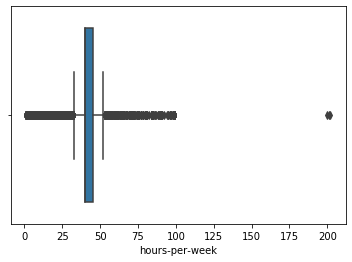

In [9]:
#Check for outliers
sns.boxplot(x=df['hours-per-week'])

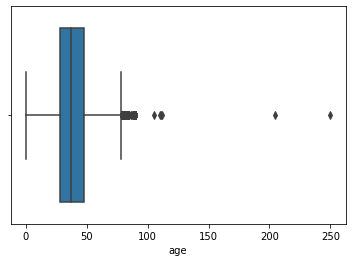

In [10]:
sns.boxplot(x=df['age'])

In [11]:
df.age.unique()

array([ 39,  50,  38,  53,  28,  37,  49,  52,  31,  42,  30,  23,  32,
        40,  34,  25,  43,  54,  35,  59,  56,   0,  19,  20,  45,  22,
        48,  21,  24,  57,  44,  41,  29,  18,  47,  46,  36,  79,  27,
        67,  33,  76,  17,  55,  61,  70,  64,  71,  68,  66,  51,  58,
        26,  60,  90,  75,  65,  77,  62,  63,  80,  72,  74,  69,  73,
        81,  78,  88,  82,  83,  84,  85, 110, 111, 112,  86,  87, 250,
       105, 205])

In [16]:
#Found age 0
age0 = df[df['age']==0]
age0

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [17]:
# replacing age 0 of a person who has Bachelors by median of people's age with bachelors' degree
df['age'] = df['age'].replace(0,df[df['education']=='Bachelors'].age.median())

In [19]:
#Removing outliers from age
df = df[df.age < 100]
df.shape

(32565, 15)

In [20]:
#Removing outliers from hour per week
df = df[df['hours-per-week']<175]
df.shape

(32562, 15)

In [21]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [22]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [23]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [24]:
#Replacing '?'(missing values) in workclass by most common value i.e. Private
#Replacing '?'(missing values) in native-country by most common value i.e. United-States
df['workclass'] = df['workclass'].replace('?','Private')
df['native-country'] = df['native-country'].replace('?','United-States')

In [25]:
# Removing "?" from our dataset
df = df[df['occupation']!= '?']

In [26]:
df.shape

(30719, 15)

## Basic exploration of relationship with plots and graphs.

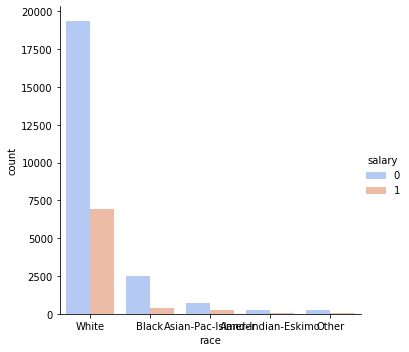

In [27]:
sns.factorplot('race', kind = 'count', hue = 'salary', data =df, palette = 'coolwarm')

### Per the ratio between the salary=1 versus salary =0, we can see that whites earn more than any other race and whites are more likely to be paid more than 80k.

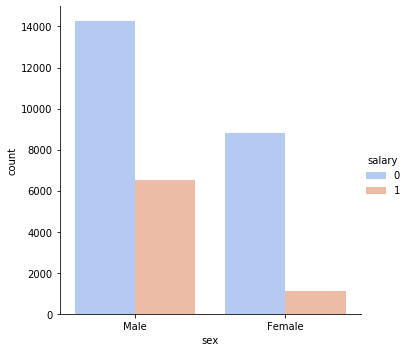

In [28]:
sns.factorplot('sex', kind = 'count', hue = 'salary', data =df, palette = 'coolwarm')

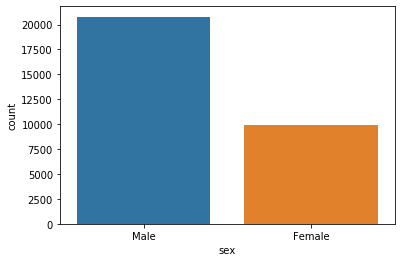

In [29]:
sns.countplot(df['sex'])

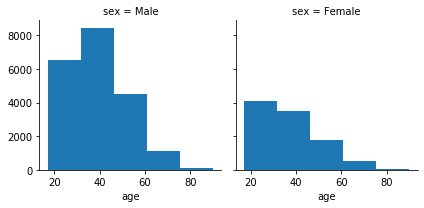

In [30]:
g = sns.FacetGrid(df, col='sex')
g = g.map(plt.hist, 'age', bins = 5)

### Male workforce is double female. Men are likely to be at the peak of career at the age of 40 but the female workforce starts do decrease after the age of 40

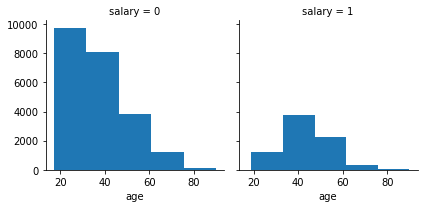

In [32]:
g = sns.FacetGrid(df, col='salary')
g = g.map(plt.hist, 'age', bins = 5)

### Young adults(below 40) are likely to get paid less than 80k. However, adults between age of 40 to 60 are more likely to get higher than other age groups.

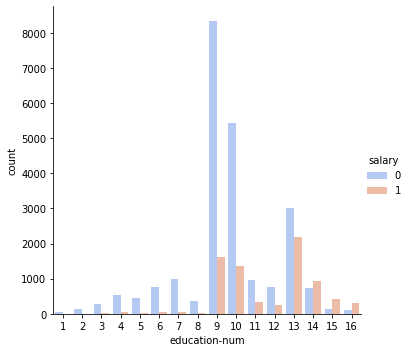

In [33]:
sns.factorplot('education-num', kind = 'count', hue = 'salary', data =df, palette = 'coolwarm')

### Higher education does not always tranlate to higher salary.

In [34]:
numerical_features = ['age', 'fnlwgt','capital-gain','capital-loss','hours-per-week','education-num','salary']

In [35]:
numerical_df = df[numerical_features]
numerical_df

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,education-num,salary
0,39,77516,2174,0,40,13,0
1,50,83311,0,0,13,13,0
2,38,215646,0,0,40,9,0
3,53,234721,0,0,40,7,0
4,28,338409,0,0,40,13,0
...,...,...,...,...,...,...,...
32566,27,257302,0,0,38,12,0
32567,40,154374,0,0,40,9,1
32568,58,151910,0,0,40,9,0
32569,22,201490,0,0,20,9,0


##  Setup dummy variables to take care categorical variables

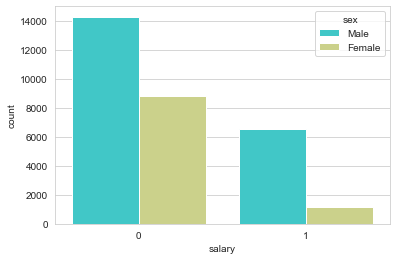

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='sex',data=df,palette='rainbow')

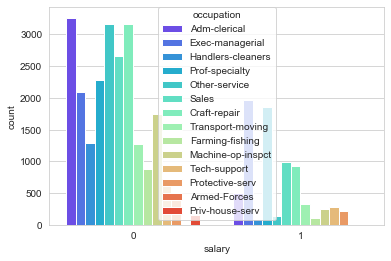

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='occupation',data=df,palette='rainbow')

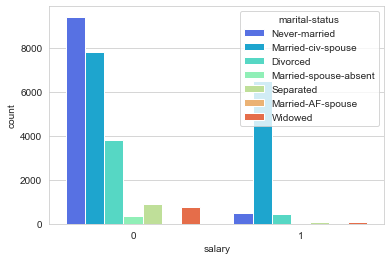

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='marital-status',data=df,palette='rainbow')

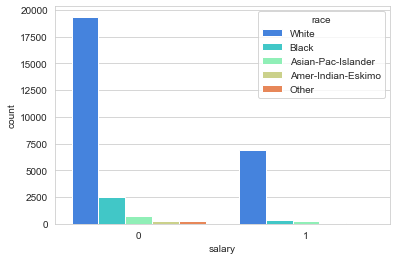

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='race',data=df,palette='rainbow')

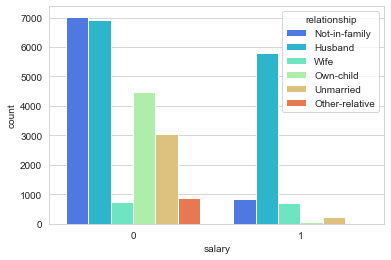

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='relationship',data=df,palette='rainbow')

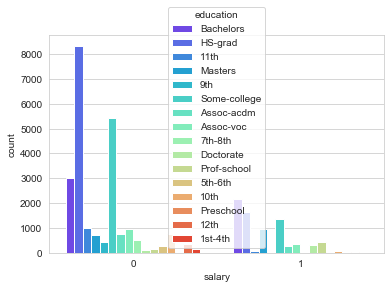

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='education',data=df,palette='rainbow')

### All these categorical variables effect salary so we consider them in our model.

In [42]:
# call the get_dummies method for the categorical variable
sex = pd.get_dummies(df['sex'],drop_first=True)
race = pd.get_dummies(df['race'],drop_first=True)
occupation = pd.get_dummies(df['occupation'],drop_first=True)
education = pd.get_dummies(df['education'],drop_first=True)
marital_status = pd.get_dummies(df['marital-status'],drop_first=True)
relationship = pd.get_dummies(df['relationship'],drop_first=True)

In [43]:
#new df will hold numerical var plus some categorical val
df2 = pd.concat([numerical_df,sex,race,occupation,education,marital_status,relationship],axis=1)

In [44]:
df2

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,education-num,salary,Male,Asian-Pac-Islander,Black,...,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,77516,2174,0,40,13,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,50,83311,0,0,13,13,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,38,215646,0,0,40,9,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,0,0,40,7,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,28,338409,0,0,40,13,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32566,27,257302,0,0,38,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32567,40,154374,0,0,40,9,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32568,58,151910,0,0,40,9,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32569,22,201490,0,0,20,9,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


## Separate data set into training and testing.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], 
                                                    test_size=0.20, 
                                                    random_state=101)

In [46]:
#Model 1
model1 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model1.fit(X_train,y_train)
model1_pred = model1.predict(X_test)
print(confusion_matrix(y_test,model1_pred))
print(classification_report(y_test,model1_pred))
print(accuracy_score(y_test, model1_pred))

[[4353  223]
 [ 750  818]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4576
           1       0.79      0.52      0.63      1568

    accuracy                           0.84      6144
   macro avg       0.82      0.74      0.76      6144
weighted avg       0.84      0.84      0.83      6144

0.8416341145833334


In [47]:
#Model 2
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, y_train)
model2_pred = model2.predict(X_test)
print(classification_report(y_test,model2_pred))
print(accuracy_score(y_test, model2_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4576
           1       0.74      0.62      0.67      1568

    accuracy                           0.85      6144
   macro avg       0.81      0.77      0.79      6144
weighted avg       0.84      0.85      0.84      6144

0.8463541666666666


## Cross Validation on Model 1: Decision Tree and Model 2: Random Forest

In [49]:
from sklearn import metrics
import random

Trial 0, Accuracy Score: 0.8372395833333334, 
Trial 1, Accuracy Score: 0.8426106770833334, 
Trial 2, Accuracy Score: 0.8372395833333334, 
Trial 3, Accuracy Score: 0.8382161458333334, 
Trial 4, Accuracy Score: 0.84033203125, 
Trial 5, Accuracy Score: 0.8318684895833334, 
Trial 6, Accuracy Score: 0.8409830729166666, 
Trial 7, Accuracy Score: 0.8502604166666666, 
Trial 8, Accuracy Score: 0.84375, 
Trial 9, Accuracy Score: 0.8391927083333334, 


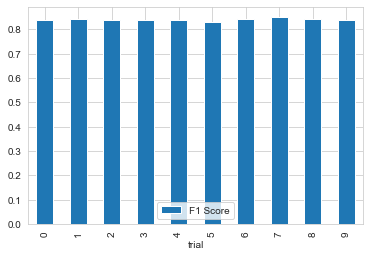

In [50]:
#Cross validation on Model 1
f1score = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], 
                                                    test_size=0.20, random_state = random.randint(1,1000))
    model1 = DecisionTreeClassifier(max_depth=3, criterion='gini')
    model1.fit(X_train,y_train)
    model1_pred = model1.predict(X_test)
    print('Trial {}, Accuracy Score: {}, '.format(i, accuracy_score(y_test, model1_pred)))
    f1score.append(accuracy_score(y_test, model1_pred))
    
score = pd.DataFrame( {'trial': range(10), 'F1 Score': f1score})
score.plot.bar(x='trial', y='F1 Score')

### The F1 score of model 1 is similar in all ten trails so we consider this a good model.

Trial 0, Accuracy Score: 0.8538411458333334, 
Trial 1, Accuracy Score: 0.84423828125, 
Trial 2, Accuracy Score: 0.8486328125, 
Trial 3, Accuracy Score: 0.8507486979166666, 
Trial 4, Accuracy Score: 0.8513997395833334, 
Trial 5, Accuracy Score: 0.8458658854166666, 
Trial 6, Accuracy Score: 0.84716796875, 
Trial 7, Accuracy Score: 0.8527018229166666, 
Trial 8, Accuracy Score: 0.8416341145833334, 
Trial 9, Accuracy Score: 0.8474934895833334, 


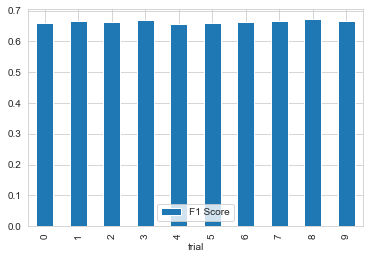

In [51]:
#Cross validation on Model 2
f1score=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df2.drop('salary',axis=1),
                                                    df2['salary'], 
                                                    test_size=0.20, random_state = random.randint(1,1000))
    model2 = RandomForestClassifier(n_estimators=100)
    model2.fit(X_train, y_train)
    model2_pred = model2.predict(X_test)
    print('Trial {}, Accuracy Score: {}, '.format(i, accuracy_score(y_test, model2_pred)))
    f1score.append(accuracy_score(y_test, model1_pred))

    
score = pd.DataFrame( {'trial': range(10), 'F1 Score': f1score})
score.plot.bar(x='trial', y='F1 Score')


### The F1 score of model 2 is similar in all ten trails so we consider this a good model.

## Last note: Random Forest Classifer(RFC) has accuracy of 85% which is 1% higher than the accuracy of Decision Tree Classifer. Thus, RFC is better model.